<a href="https://colab.research.google.com/github/micaela-mangubat/playground/blob/master/Earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

In [0]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

In [0]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#The dataset was scraped from earthquake.phivolcs.dost.gov.ph using Data Miner chrome extension
names = ['day', 'month', 'year','time', 'period', 'latitude', 'longitude', 'depth', 'magnitude', 'location', 'province']
dataset = read_csv("/content/drive/My Drive/testdata/Earthquake/1718.csv", names=names)

In [0]:
# Shape
print('*Dataset Shape')
print(dataset.shape)
# Head
print('*Data samples')
print(dataset.head(5))
# Descriptions
print('*Data Description')
print(dataset.describe())
# Data Types
print('*Data types')
print(dataset.dtypes)
# Recorded earthquakes per province
print('*Recorded earthquakes per province')
print(dataset.groupby('province').size())
# Recorded earthquakes per year
print('*Recorded earthquakes per year')
print(dataset.groupby('year').size())

*Dataset Shape
(11638, 11)
*Data samples
   day  month  ...                        location             province
0   31      1  ...     073 km S 67° E of Sarangani     Davao Occidental
1   31      1  ...  003 km N 16° E of Surigao City    Surigao del Norte
2   31      1  ...         022 km S 21° W of Basay      Negros Oriental
3   31      1  ...  022 km N 20° W of Dipolog City  Zamboanga del Norte
4   31      1  ...     015 km S 33° W of Calatagan             Batangas

[5 rows x 11 columns]
*Data Description
                day         month  ...         depth     magnitude
count  11638.000000  11638.000000  ...  11638.000000  11638.000000
mean      15.566936      6.650971  ...     33.960474      2.712055
std        8.804140      3.286710  ...     48.042577      0.651293
min        1.000000      1.000000  ...      0.000000      1.200000
25%        8.000000      4.000000  ...      9.000000      2.200000
50%       15.000000      7.000000  ...     22.000000      2.600000
75%       23.0000

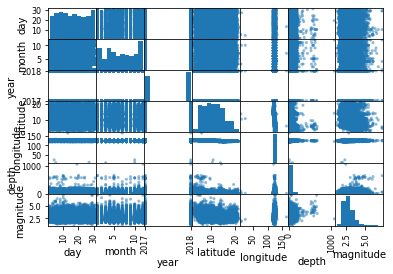

In [0]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

#Insights: None of the data has a strong relationship. New variables could be
#          added such as proximity to the fault line to determine if this has
#          an effect on the frequency of earthquakes in an area. Another is the
#          proximity to an area with a recent activity.

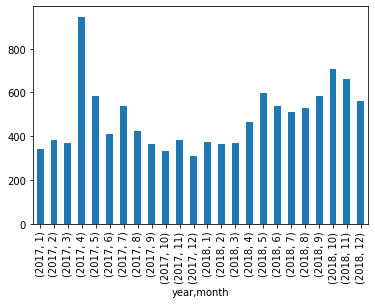

In [0]:
# Earthquakes per month
groups = dataset.groupby(['year','month']).size()
groups.plot.bar()

# Insights: April 2017 has the most number of earthquakes.

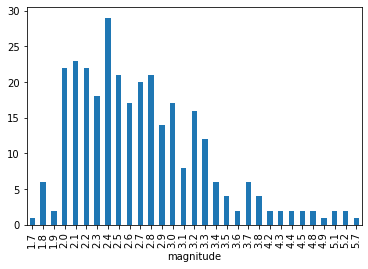

In [0]:
aprilData = dataset.loc[(dataset['month'] == 12) & (dataset['year'] == 2017)]

groups = aprilData.groupby(['magnitude']).size()
groups.plot.bar()
# Insights: Despite having the most number of tremors, these were generally 
#           not felt and non-destructive.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c7368f5c0>]],
      dtype=object)

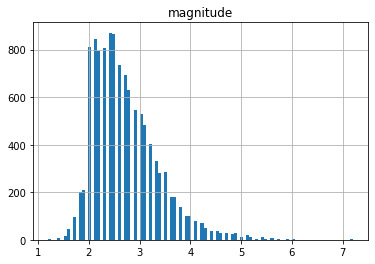

In [0]:
dataset.hist(column='magnitude', bins=100)
# Insights: Most earthquakes recorded have a magnitude of less than 3 
#           although there are few above 5.
#           The strongest earthquake recorded has a magnitude of 7.2.

In [0]:
import folium
from shapely.geometry import mapping, shape
from shapely.prepared import prep
from shapely.geometry import Point

phMap = folium.Map([dataset['latitude'].mean(), dataset['longitude'].mean()],
               zoom_start=5, min_zoom = 2, max_zoom = 10)

for i in range(0,len(dataset)):
  popup_text = dataset.iloc[i]['magnitude'].astype(str)
  if dataset.iloc[i]['magnitude'] >= 5:
   folium.Circle(
       [dataset.iloc[i]['latitude'], dataset.iloc[i]['longitude']],
       radius=dataset.iloc[i]['magnitude']*5000, 
       popup=popup_text,
       color='red',
       fill=True).add_to(phMap)

phMap

# Insights: There are no earthquakes in Palawan for the 2017-2018. 
#           - More data is needed to verify if earthquakes do not occur 
#             in that area.
#           On the other hand, around sixty strong quakes were felt in the 
#           southern part of the country, even on the sea so those areas should 
#           prepare for the possibility of a tsunami as well.
#           Since the most affected regions can be seen, the local government
#           units may be alloted more budget for disaster management. 
#           They can also prioritize reinforcing their structures to prevent 
#           being destroyed easily by the tremors.

# The radius is just an estimate to emphasize the magnitudes in the map
# Click on a circle to view the magnitude